<a href="https://colab.research.google.com/github/ikechiamaka/WeatherPredictionLSTM_RNN/blob/main/WeatherSNRBERCapBan_ModelCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

# **DATASET PREPROCESSING**



*   Reading the raw weather data with pandas dataframe and making the dateTime column the index.

In [2]:
df = pd.read_csv('snr_ber_data.csv', index_col = 'datetime')
df

,temperature,humidity,pressure,snr,ber,capacity,bandwidth
datetime,,,,,,,
1983-01-01 00:00:00+00:00,-2.87,75,1021,201.265867,7.740733e-90,6.084611e+07,10000000.0
1983-01-01 01:00:00+00:00,-2.95,75,1021,201.265666,7.742296e-90,6.084610e+07,10000000.0
1983-01-01 02:00:00+00:00,-2.83,78,1020,201.239468,7.948323e-90,6.084425e+07,10000000.0
1983-01-01 03:00:00+00:00,-2.84,80,1019,201.222041,8.088400e-90,6.084302e+07,10000000.0
1983-01-01 04:00:00+00:00,-2.97,82,1019,201.203591,8.239395e-90,6.084172e+07,10000000.0
...,...,...,...,...,...,...,...
2023-02-18 19:00:00+00:00,-1.29,65,1018,201.361668,7.031917e-90,6.085288e+07,10000000.0
2023-02-18 20:00:00+00:00,-0.65,65,1018,201.363040,7.022253e-90,6.085298e+07,10000000.0
2023-02-18 21:00:00+00:00,-0.67,69,1019,201.326526,7.284058e-90,6.085040e+07,10000000.0




*   The dataset has alot of NaN values ie missing values, we need to check which column has missing values and know how much data is missing
 0's mean that there are 0 missing values in said column 



In [3]:
df.apply(pd.isnull).sum()

temperature    0
humidity       0
pressure       0
snr            0
ber            0
capacity       0
bandwidth      0
dtype: int64



*   converting those values to percentage, to know the percentage of the column that has missing values




In [4]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

temperature    0.0
humidity       0.0
pressure       0.0
snr            0.0
ber            0.0
capacity       0.0
bandwidth      0.0
dtype: float64



*   NOw we make any colume that it's percentage of missing values less than 5 a valid column and we print out the valid columns and discard any column that has a percentage above 5%




In [5]:
valid_columns = df.columns[null_pct<.05]
valid_columns

Index(['temperature', 'humidity', 'pressure', 'snr', 'ber', 'capacity',
       'bandwidth'],
      dtype='object')



*   Making a copy of the dataframe or of the cleaned dataset




In [6]:
df = df[valid_columns].copy()
df

,temperature,humidity,pressure,snr,ber,capacity,bandwidth
datetime,,,,,,,
1983-01-01 00:00:00+00:00,-2.87,75,1021,201.265867,7.740733e-90,6.084611e+07,10000000.0
1983-01-01 01:00:00+00:00,-2.95,75,1021,201.265666,7.742296e-90,6.084610e+07,10000000.0
1983-01-01 02:00:00+00:00,-2.83,78,1020,201.239468,7.948323e-90,6.084425e+07,10000000.0
1983-01-01 03:00:00+00:00,-2.84,80,1019,201.222041,8.088400e-90,6.084302e+07,10000000.0
1983-01-01 04:00:00+00:00,-2.97,82,1019,201.203591,8.239395e-90,6.084172e+07,10000000.0
...,...,...,...,...,...,...,...
2023-02-18 19:00:00+00:00,-1.29,65,1018,201.361668,7.031917e-90,6.085288e+07,10000000.0
2023-02-18 20:00:00+00:00,-0.65,65,1018,201.363040,7.022253e-90,6.085298e+07,10000000.0
2023-02-18 21:00:00+00:00,-0.67,69,1019,201.326526,7.284058e-90,6.085040e+07,10000000.0




*   checking if the cleaning was successful, with all the valid columns




In [7]:
df.apply(pd.isnull).sum()

temperature    0
humidity       0
pressure       0
snr            0
ber            0
capacity       0
bandwidth      0
dtype: int64



*   check the datatype of each valid column 




In [8]:
df.dtypes

temperature    float64
humidity         int64
pressure         int64
snr            float64
ber            float64
capacity       float64
bandwidth      float64
dtype: object



*   check the date format of the index and it's datatype, to know if you would need to convert it or not




In [9]:
df.index

Index(['1983-01-01 00:00:00+00:00', '1983-01-01 01:00:00+00:00',
       '1983-01-01 02:00:00+00:00', '1983-01-01 03:00:00+00:00',
       '1983-01-01 04:00:00+00:00', '1983-01-01 05:00:00+00:00',
       '1983-01-01 06:00:00+00:00', '1983-01-01 07:00:00+00:00',
       '1983-01-01 08:00:00+00:00', '1983-01-01 09:00:00+00:00',
       ...
       '2023-02-18 14:00:00+00:00', '2023-02-18 15:00:00+00:00',
       '2023-02-18 16:00:00+00:00', '2023-02-18 17:00:00+00:00',
       '2023-02-18 18:00:00+00:00', '2023-02-18 19:00:00+00:00',
       '2023-02-18 20:00:00+00:00', '2023-02-18 21:00:00+00:00',
       '2023-02-18 22:00:00+00:00', '2023-02-18 23:00:00+00:00'],
      dtype='object', name='datetime', length=372004)



*   The index has a weird format with UTC at the end making it hard to convert to datetime, so we have to clear out the UTC and Parse it. Then the convertion is successful




In [10]:
from dateutil import parser
import pandas as pd
df.index = df.index.str.replace(' UTC', '')
# Parse the index column using dateutil.parser.parse()
df.index = df.index.map(lambda x: parser.parse(x))

# Verify that the index is now a DatetimeIndex
print(df.index)


DatetimeIndex(['1983-01-01 00:00:00+00:00', '1983-01-01 01:00:00+00:00',
               '1983-01-01 02:00:00+00:00', '1983-01-01 03:00:00+00:00',
               '1983-01-01 04:00:00+00:00', '1983-01-01 05:00:00+00:00',
               '1983-01-01 06:00:00+00:00', '1983-01-01 07:00:00+00:00',
               '1983-01-01 08:00:00+00:00', '1983-01-01 09:00:00+00:00',
               ...
               '2023-02-18 14:00:00+00:00', '2023-02-18 15:00:00+00:00',
               '2023-02-18 16:00:00+00:00', '2023-02-18 17:00:00+00:00',
               '2023-02-18 18:00:00+00:00', '2023-02-18 19:00:00+00:00',
               '2023-02-18 20:00:00+00:00', '2023-02-18 21:00:00+00:00',
               '2023-02-18 22:00:00+00:00', '2023-02-18 23:00:00+00:00'],
              dtype='datetime64[ns, tzlocal()]', name='datetime', length=372004, freq=None)


In [11]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M:%S')
df[:26]

,temperature,humidity,pressure,snr,ber,capacity,bandwidth
datetime,,,,,,,
1983-01-01 00:00:00+00:00,-2.87,75,1021,201.265867,7.740733e-90,6.084611e+07,10000000.0
1983-01-01 01:00:00+00:00,-2.95,75,1021,201.265666,7.742296e-90,6.084610e+07,10000000.0
1983-01-01 02:00:00+00:00,-2.83,78,1020,201.239468,7.948323e-90,6.084425e+07,10000000.0
1983-01-01 03:00:00+00:00,-2.84,80,1019,201.222041,8.088400e-90,6.084302e+07,10000000.0
1983-01-01 04:00:00+00:00,-2.97,82,1019,201.203591,8.239395e-90,6.084172e+07,10000000.0
1983-01-01 05:00:00+00:00,-2.95,83,1018,201.195333,8.307889e-90,6.084113e+07,10000000.0
1983-01-01 06:00:00+00:00,-2.96,83,1018,201.195305,8.308121e-90,6.084113e+07,10000000.0
1983-01-01 07:00:00+00:00,-3.07,82,1018,201.204045,8.235647e-90,6.084175e+07,10000000.0
1983-01-01 08:00:00+00:00,-3.02,82,1017,201.204910,8.228503e-90,6.084181e+07,10000000.0


Export the cleaned weather data for future use


Plot the temperature against time to see the flow

<AxesSubplot:xlabel='datetime'>

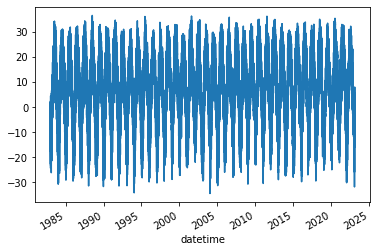

In [12]:
temp = df['temperature']
temp.plot()

In [13]:
#This is a code snippet that defines a simple LSTM (Long Short-Term Memory) Recurrent neural network using the Keras API in TensorFlow 2.x. Here's what each line of the code does:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [14]:
# Create a new DataFrame called temp_df with a single column 'Temperature' containing the values from 'temp'
temp_df = pd.DataFrame({'Temperature': temp})

# Map the index of temp_df to seconds and add a new column called 'Seconds'
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)


In [15]:
# Define the number of seconds in a day and a year based on the number of seconds in an hour, day, and year
day = 60 * 60 * 24
year = 365.2425 * day

# Add four new columns to temp_df called 'Day sin', 'Day cos', 'Year sin', and 'Year cos' that represent the cyclic nature of time
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))

# Display the first few rows of the modified DataFrame temp_df
temp_df.head()


,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,
1983-01-01 00:00:00+00:00,-2.87,410227200.0,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,-2.95,410230800.0,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,-2.83,410234400.0,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,-2.84,410238000.0,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,-2.97,410241600.0,8.660254e-01,0.500000,0.000244,1.000000


In [16]:
# Drop the 'Seconds' column from the DataFrame temp_df
temp_df = temp_df.drop('Seconds', axis=1)

# Display the first few rows of the modified DataFrame temp_df
temp_df.head()


,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
1983-01-01 00:00:00+00:00,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [17]:
p_temp_df = pd.concat([df['pressure'], temp_df], axis=1)
p_temp_df.head()

,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,
1983-01-01 00:00:00+00:00,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [18]:
p_temp_df = pd.concat([df['humidity'], p_temp_df], axis=1)
p_temp_df.head()

,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,
1983-01-01 00:00:00+00:00,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [19]:
p_temp_df = pd.concat([df['snr'], p_temp_df], axis=1)
p_temp_df.head()

,snr,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,
1983-01-01 00:00:00+00:00,201.265867,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,201.265666,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,201.239468,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,201.222041,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,201.203591,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [20]:
p_temp_df = pd.concat([df['ber'], p_temp_df], axis=1)
p_temp_df.head()

,ber,snr,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,
1983-01-01 00:00:00+00:00,7.740733e-90,201.265867,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,7.742296e-90,201.265666,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,7.948323e-90,201.239468,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,8.088400e-90,201.222041,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,8.239395e-90,201.203591,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [21]:
p_temp_df = pd.concat([df['capacity'], p_temp_df], axis=1)
p_temp_df.head()

,capacity,ber,snr,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,,
1983-01-01 00:00:00+00:00,6.084611e+07,7.740733e-90,201.265867,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,6.084610e+07,7.742296e-90,201.265666,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,6.084425e+07,7.948323e-90,201.239468,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,6.084302e+07,8.088400e-90,201.222041,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,6.084172e+07,8.239395e-90,201.203591,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [22]:
p_temp_df.shape

(372004, 10)

In [23]:
def df_to_X_y3(df, window_size=11):
  # Convert the input dataframe to numpy array
  df_as_np = df.to_numpy()
  # Initialize empty lists for input and target data
  X = []
  y = []
  # Loop through each row of the data, until there are `window_size` rows left
  for i in range(len(df_as_np)-window_size):
    # Extract a window of `window_size` rows and append it to the input data
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    # Extract the target values from the row `window_size` steps ahead and append it to the target data
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3], df_as_np[i+window_size][4], df_as_np[i+window_size][5]]
    y.append(label)
  # Convert the input and target data to numpy arrays and return them
  return np.array(X), np.array(y)


In [24]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((371993, 11, 10), (371993, 6))

In [25]:
# Split the input and output arrays into train, validation, and test sets
X3_train, y3_train = X3[:300000], y3[:300000]
X3_val, y3_val = X3[300000:360000], y3[300000:360000]
X3_test, y3_test = X3[360000:], y3[360000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((300000, 11, 10),
 (300000, 6),
 (60000, 11, 10),
 (60000, 6),
 (11993, 11, 10),
 (11993, 6))

In [26]:
# Calculate mean and standard deviation for each feature in the training set
cap_training_mean3 = np.mean(X3_train[:, :, 0])
cap_training_std3 = np.std(X3_train[:, :, 0])

ber_training_mean3 = np.mean(X3_train[:, :, 1])
ber_training_std3 = np.std(X3_train[:, :, 1])

snr_training_mean3 = np.mean(X3_train[:, :, 2])
snr_training_std3 = np.std(X3_train[:, :, 2])

h_training_mean3 = np.mean(X3_train[:, :, 3])
h_training_std3 = np.std(X3_train[:, :, 3])

p_training_mean3 = np.mean(X3_train[:, :, 4])
p_training_std3 = np.std(X3_train[:, :, 4])

temp_training_mean3 = np.mean(X3_train[:, :, 5])
temp_training_std3 = np.std(X3_train[:, :, 5])

# Define function to preprocess input
def preprocess3(X):
  # Normalize each feature in the input by subtracting the mean and dividing by the standard deviation
  X[:, :, 0] = (X[:, :, 0] - cap_training_mean3) / cap_training_std3
  X[:, :, 1] = (X[:, :, 1] - ber_training_mean3) / ber_training_std3
  X[:, :, 2] = (X[:, :, 2] - snr_training_mean3) / snr_training_std3
  X[:, :, 3] = (X[:, :, 3] - h_training_mean3) / h_training_std3
  X[:, :, 4] = (X[:, :, 4] - p_training_mean3) / p_training_std3
  X[:, :, 5] = (X[:, :, 5] - temp_training_mean3) / temp_training_std3

# Define function to preprocess output
def preprocess_output3(y):
  # Normalize each feature in the output by subtracting the mean and dividing by the standard deviation
  y[:, 0] = (y[:, 0] - cap_training_mean3) / cap_training_std3
  y[:, 1] = (y[:, 1] - ber_training_mean3) / ber_training_std3
  y[:, 2] = (y[:, 2] - snr_training_mean3) / snr_training_std3
  y[:, 3] = (y[:, 3] - h_training_mean3) / h_training_std3
  y[:, 4] = (y[:, 4] - p_training_mean3) / p_training_std3
  y[:, 5] = (y[:, 5] - temp_training_mean3) / temp_training_std3
  return y


In [27]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [28]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.29314431, -0.37443682,  0.29272863, -0.26090457, -0.81720098,
         0.00395002],
       [ 0.23630593, -0.31845648,  0.23588969, -0.20586399, -0.81720098,
        -0.01336707],
       [ 0.12731805, -0.20968296,  0.12690783, -0.09578282, -0.81720098,
        -0.01831481],
       ...,
       [ 0.09728553, -0.17937549,  0.09687859, -0.20586399,  0.4601132 ,
        -0.59884984],
       [-0.13255425,  0.05744111, -0.13291262,  0.01429834,  0.4601132 ,
        -0.62853629],
       [-0.30965848,  0.24593879, -0.30995121,  0.17942009,  0.69235214,
        -0.62936091]])

In [29]:
# Define the model architecture
model5 = Sequential()
# Add an input layer that takes a 3D tensor of shape (11, 10)
model5.add(InputLayer((11, 10)))
# Add an LSTM layer with 64 units
model5.add(LSTM(64))
# Add a dense layer with 9 units and relu activation
model5.add(Dense(11, 'relu'))
# Add a dense output layer with 4 units (one for each variable we're predicting) and linear activation
model5.add(Dense(6, 'linear'))

# Print a summary of the model architecture
model5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19200     
                                                                 
 dense (Dense)               (None, 11)                715       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
Total params: 19,987
Trainable params: 19,987
Non-trainable params: 0
_________________________________________________________________


In [30]:
# define a ModelCheckpoint callback to save the best model during training
cp5 = ModelCheckpoint('model5/', save_best_only=True)

# compile the model using the Mean Squared Error loss function, Adam optimizer with a learning rate of 0.0001,
# and the Root Mean Squared Error as the evaluation metric
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [31]:
# Create a wrapper function for the model5.fit() call
def train_model():
    return model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

# Call the wrapper function and get the history object
history = train_model()


Epoch 1/10
9374/9375 [============================>.] - ETA: 0s - loss: 0.1019 - root_mean_squared_error: 0.3192

9375/9375 [==============================] - 55s 5ms/step - loss: 0.1019 - root_mean_squared_error: 0.3192 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1845
Epoch 2/10
9366/9375 [============================>.] - ETA: 0s - loss: 0.0616 - root_mean_squared_error: 0.2482

9375/9375 [==============================] - 45s 5ms/step - loss: 0.0616 - root_mean_squared_error: 0.2482 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 3/10
9373/9375 [============================>.] - ETA: 0s - loss: 0.0605 - root_mean_squared_error: 0.2460

9375/9375 [==============================] - 45s 5ms/step - loss: 0.0605 - root_mean_squared_error: 0.2460 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 4/10
9375/9375 [==============================] - 41s 4ms/step - loss: 0.0599 - root_mean_squared_error: 0.2447 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 5/10
9374/9375 [============================>.] - ETA: 0s - loss: 0.0595 - root_mean_squared_error: 0.2439

9375/9375 [==============================] - 45s 5ms/step - loss: 0.0595 - root_mean_squared_error: 0.2439 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 6/10
9375/9375 [==============================] - 41s 4ms/step - loss: 0.0592 - root_mean_squared_error: 0.2433 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1744
Epoch 7/10
9375/9375 [==============================] - 42s 4ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 8/10
9375/9375 [==============================] - 41s 4ms/step - loss: 0.0588 - root_mean_squared_error: 0.2424 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1745
Epoch 9/10
9375/9375 [==============================] - 42s 5ms/step - loss: 0.0586 - root_mean_squared_error: 0.2421 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 10/10
9375/9375 [==============================] - 42s 5ms/step - loss: 0.0584 - root_mean_squared_error: 0.2417 - val_loss: 0.030

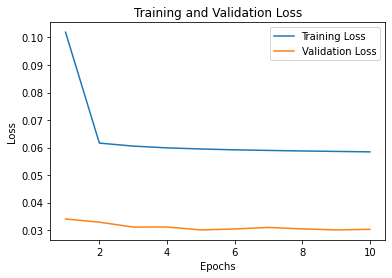

In [34]:
import matplotlib.pyplot as plt

# Extract the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epoch numbers (1 to number of epochs + 1)
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

# Add labels, legend, and title to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Display the plot
plt.show()

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

#This function takes in a trained model, input data (X) and corresponding output data (y) and plots the predicted 
#and actual values of temperature, pressure, humidity, and wind speed variables.

#start and end are the starting and ending indices of the time range for which the predictions should be plotted.
#figsize is a tuple specifying the size of the figure to be plotted.
#The function creates a pandas dataframe that contains the predicted and actual values for temperature, pressure, humidity, and wind speed variables. 
#Then, it plots the predicted and actual values of each variable in a different color. 
#The x-axis of the plot is time and the y-axis is the values of the variables.

#The function returns the dataframe containing the predicted and actual values for the specified time range.

def plot_predictions2(model, X, y, start=0, end=100, figsize=(12,8)):
    # Generate predictions using the model
    predictions = model.predict(X)
    # Extract the predictions and actual values for each weather variable
    cap_preds, ber_preds, snr_preds, h_preds, p_preds, temp_preds = predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3], predictions[:, 4], predictions[:, 5]
    cap_actuals,ber_actuals, snr_actuals, h_actuals, p_actuals, temp_actuals = y[:, 0], y[:, 1], y[:, 2], y[:, 3], y[:, 4], y[:, 5]
    # Create a DataFrame to store the predictions and actual values
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals,
                            'Humidity Predictions': h_preds,
                            'Humidity Actuals': h_actuals,
                            'Capacity Predictions': cap_preds,
                            'Capacity Actuals': cap_actuals,
                            'BER Predictions': ber_preds,
                            'BER Actuals': ber_actuals,
                            'SNR Predictions': snr_preds,
                            'SNR Actuals': snr_actuals



                            })
    # Create a new figure with the specified size
    fig, ax = plt.subplots(figsize=figsize)
    # Plot the predictions and actual values for each weather variable
    ax.plot(df.index[start:end], df['Temperature Predictions'][start:end], color='red', label='Temperature Predictions')
    ax.plot(df.index[start:end], df['Temperature Actuals'][start:end], color='orange', label='Temperature Actuals')
    ax.plot(df.index[start:end], df['Pressure Predictions'][start:end], color='blue', label='Pressure Predictions')
    ax.plot(df.index[start:end], df['Pressure Actuals'][start:end], color='green', label='Pressure Actuals')
    ax.plot(df.index[start:end], df['Humidity Predictions'][start:end], color='purple', label='Humidity Predictions')
    ax.plot(df.index[start:end], df['Humidity Actuals'][start:end], color='pink', label='Humidity Actuals')
    ax.plot(df.index[start:end], df['Capacity Predictions'][start:end], color='brown', label='Capacity Predictions')
    ax.plot(df.index[start:end], df['Capacity Actuals'][start:end], color='gray', label='Capacity Actuals')
    
    ax.plot(df.index[start:end], df['BER Predictions'][start:end], color='dodgerblue', label='BER Predictions')
    ax.plot(df.index[start:end], df['BER Actuals'][start:end], color='orange', label='BER Actuals')

    ax.plot(df.index[start:end], df['SNR Predictions'][start:end], color='limegreen', label='SNR Predictions')
    ax.plot(df.index[start:end], df['SNR Actuals'][start:end], color='crimson', label='SNR Actuals')

    # Add a legend and axis labels to the plot
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.set_title('Weather Variables Predictions vs Actuals')
    # Return a subset of the DataFrame with the specified range
    return df[start:end]





375/375 [==============================] - 2s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals,Humidity Predictions,Humidity Actuals,Capacity Predictions,Capacity Actuals,BER Predictions,BER Actuals,SNR Predictions,SNR Actuals
0,-0.007554,0.003950,-0.932955,-0.817201,-0.188225,-0.260905,0.224105,0.293144,-0.288053,-0.374437,0.222290,0.292729
1,-0.038925,-0.013367,-0.823315,-0.817201,-0.107531,-0.205864,0.142470,0.236306,-0.212068,-0.318456,0.131119,0.235890
2,-0.036030,-0.018315,-0.799938,-0.817201,-0.051789,-0.095783,0.105288,0.127318,-0.168689,-0.209683,0.092712,0.126908
3,-0.003803,-0.000173,-0.803103,-0.817201,-0.049189,0.289501,0.108303,-0.248089,-0.172593,0.179804,0.097663,-0.248407
4,0.040190,0.046830,-0.819631,-0.817201,0.206176,0.564704,-0.152049,-0.509335,0.089760,0.464948,-0.147064,-0.509525
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.417803,-0.372903,0.262052,0.343994,1.009657,1.060069,-1.063309,-1.137220,1.128689,1.200881,-1.069141,-1.136881
96,-0.269860,-0.245911,0.328703,0.343994,0.818328,0.839907,-0.845092,-0.887884,0.902411,0.899789,-0.856390,-0.887791
97,-0.124816,-0.121393,0.307672,0.343994,0.514051,0.619745,-0.525509,-0.641852,0.542219,0.614193,-0.537885,-0.641956
98,-0.028826,-0.055423,0.298134,0.343994,0.306543,0.509664,-0.310998,-0.519129,0.288502,0.475870,-0.322623,-0.519312


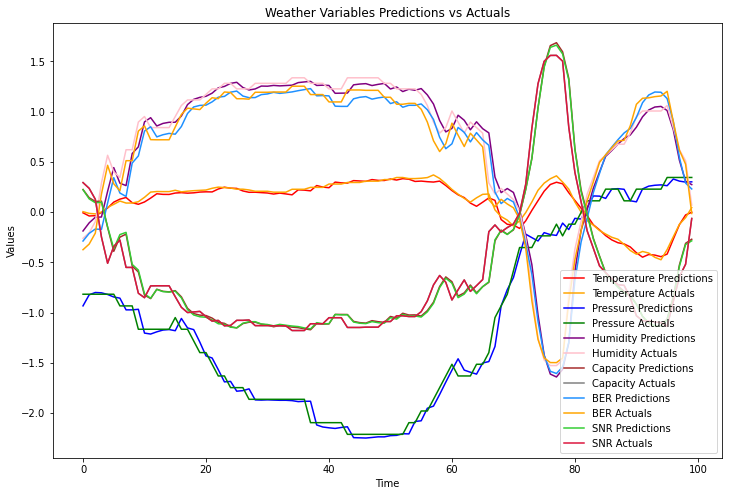

In [36]:
# Call the function plot_predictions2() with the following arguments: 
# the trained model, the test set of input features, and the test set of output labels
plot_predictions2(model5, X3_test, y3_test)


In [37]:
def postprocess_temp(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

def postprocess_h(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*h_training_std3) + h_training_mean3
  return arr

def postprocess_cap(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*cap_training_std3) + cap_training_mean3
  return arr

def postprocess_snr(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*snr_training_std3) + snr_training_mean3
  return arr

def postprocess_ber(arr):
  # multiply array by standard deviation and add mean to reverse normalization
  arr = (arr*ber_training_std3) + ber_training_mean3
  return arr

In [38]:
def plot_predictions2(model, X, y, start=0, end=100, figsize=(12,8)):
    predictions = model.predict(X)
    cap_preds, ber_preds, snr_preds, h_preds, p_preds, temp_preds = postprocess_cap(predictions[:, 0]), postprocess_ber(predictions[:, 1]),  postprocess_snr(predictions[:, 2]), postprocess_h(predictions[:, 3]), postprocess_p(predictions[:, 4]), postprocess_temp(predictions[:, 5])
    cap_actuals,ber_actuals, snr_actuals, h_actuals, p_actuals, temp_actuals =postprocess_cap(y[:, 0]), postprocess_ber(y[:, 1]), postprocess_snr(y[:, 2]), postprocess_h(y[:, 3]), postprocess_p(y[:, 4]), postprocess_temp(y[:, 5])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals,
                            'Humidity Predictions': h_preds,
                            'Humidity Actuals': h_actuals,
                            'Capacity Predictions': cap_preds,
                            'Capacity Actuals': cap_actuals,
                            'SNR Predictions': snr_preds,
                            'SNR Actuals': snr_actuals,
                            'BER Predictions': ber_preds,
                            'BER Actuals': ber_actuals
                            })
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(df.index[start:end], df['Temperature Predictions'][start:end], color='red', label='Temperature Predictions')
    ax.plot(df.index[start:end], df['Temperature Actuals'][start:end], color='orange', label='Temperature Actuals')
    ax.plot(df.index[start:end], df['Pressure Predictions'][start:end], color='blue', label='Pressure Predictions')
    ax.plot(df.index[start:end], df['Pressure Actuals'][start:end], color='green', label='Pressure Actuals')
    ax.plot(df.index[start:end], df['Humidity Predictions'][start:end], color='purple', label='Humidity Predictions')
    ax.plot(df.index[start:end], df['Humidity Actuals'][start:end], color='pink', label='Humidity Actuals')
    ax.plot(df.index[start:end], df['Capacity Predictions'][start:end], color='brown', label='Capacity Speed Predictions')
    ax.plot(df.index[start:end], df['Capacity Actuals'][start:end], color='gray', label='Capacity Actuals')

    ax.plot(df.index[start:end], df['BER Predictions'][start:end], color='dodgerblue', label='BER Predictions')
    ax.plot(df.index[start:end], df['BER Actuals'][start:end], color='orange', label='BER Actuals')

    ax.plot(df.index[start:end], df['SNR Predictions'][start:end], color='limegreen', label='SNR Predictions')
    ax.plot(df.index[start:end], df['SNR Actuals'][start:end], color='crimson', label='SNR Actuals')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.set_title('Weather Variables Predictions vs Actuals')
    return df[start:end]


375/375 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals,Humidity Predictions,Humidity Actuals,Capacity Predictions,Capacity Actuals,SNR Predictions,SNR Actuals,BER Predictions,BER Actuals
0,6.500496,6.64,1007.003174,1008.0,69.320480,68.0,60851832.0,6.085261e+07,201.346588,201.357861,0.0,7.058805e-90
1,6.120060,6.43,1007.947327,1008.0,70.786552,69.0,60850908.0,6.085197e+07,201.332001,201.348767,0.0,7.123450e-90
2,6.155167,6.37,1008.148682,1008.0,71.799301,71.0,60850488.0,6.085074e+07,201.325851,201.331330,0.0,7.249059e-90
3,6.545981,6.59,1008.121399,1008.0,71.846542,78.0,60850524.0,6.084650e+07,201.326645,201.271282,0.0,7.698830e-90
4,7.079467,7.16,1007.979065,1008.0,76.486122,83.0,60847584.0,6.084355e+07,201.287491,201.229505,0.0,8.028108e-90
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.525508,2.07,1017.294312,1018.0,91.084084,92.0,60837292.0,6.083645e+07,201.139969,201.129132,0.0,8.877947e-90
96,3.319575,3.61,1017.868347,1018.0,87.607933,88.0,60839756.0,6.083927e+07,201.173996,201.168984,0.0,8.530252e-90
97,5.078494,5.12,1017.687195,1018.0,82.079712,84.0,60843364.0,6.084205e+07,201.224960,201.208317,0.0,8.200453e-90
98,6.242537,5.92,1017.605103,1018.0,78.309616,82.0,60845788.0,6.084344e+07,201.259399,201.227939,0.0,8.040720e-90


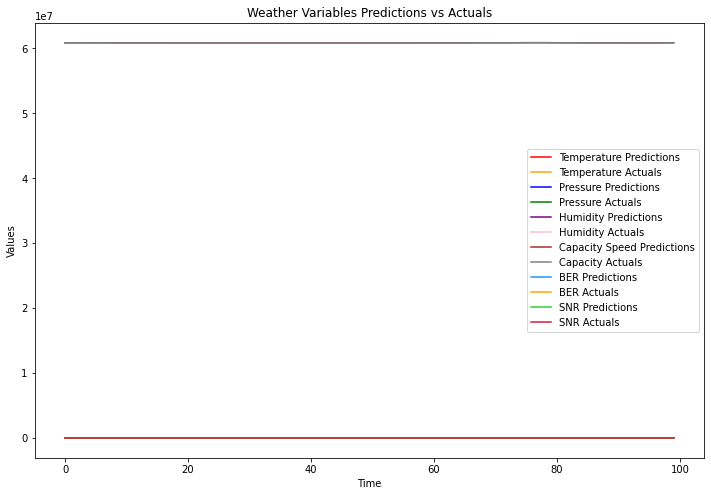

In [39]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

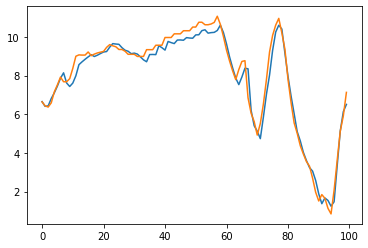

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

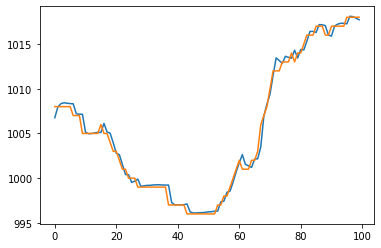

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

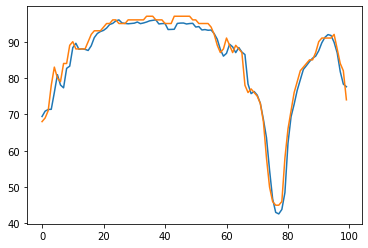

In [ ]:
plt.plot(post_processed_df['Humidity Predictions'][start:end])
plt.plot(post_processed_df['Humidity Actuals'][start:end])

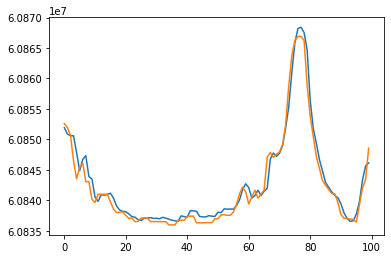

In [ ]:
plt.plot(post_processed_df['Capacity Predictions'][start:end])
plt.plot(post_processed_df['Capacity Actuals'][start:end])

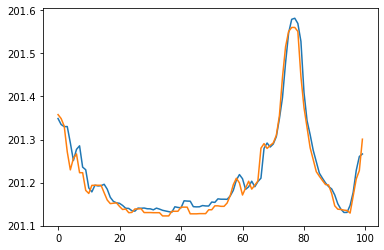

In [ ]:
plt.plot(post_processed_df['SNR Predictions'][start:end])
plt.plot(post_processed_df['SNR Actuals'][start:end])